In [1]:
%cd ..
%load_ext autoreload
%autoreload 2

/home/moshida/EUVlitho


In [2]:
from elitho.mask_pattern import LinePattern
from elitho import const
from elitho import fourier

mask = LinePattern(cd=56, gap=80, direction="V", field_type="DF")(const.NDIVX, const.NDIVY)

/home/moshida/.pyenv/versions/3.12.11/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


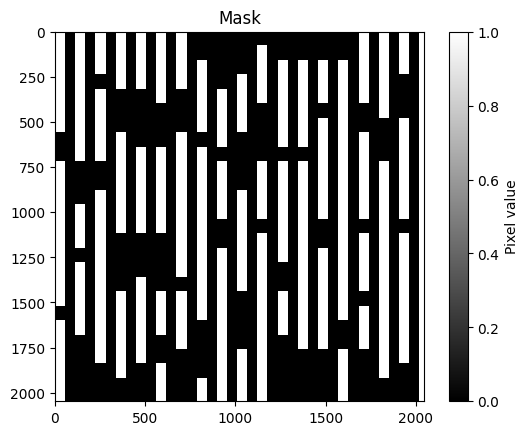

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(mask, cmap='gray', interpolation='nearest')
plt.title("Mask")
plt.colorbar(label="Pixel value")
plt.show()

In [25]:
# cpu ver
import numpy as np
from elitho import const, multilayer

polar = "X"
nsx=0
nsy=0
sx0 = 2.0 * const.pi / const.dx * nsx / const.ndivs + const.kx0
sy0 = 2.0 * const.pi / const.dy * nsy / const.ndivs + const.ky0
kx0 = sx0
ky0 = sy0
#
kxplus = kx0 + 2 * const.pi * np.array(const.lindex) / const.dx
kyplus = ky0 + 2 * const.pi * np.array(const.mindex) / const.dy
kxy2 = kxplus**2 + kyplus**2
k = const.k
matrix_size = const.Nrange

In [14]:
%%timeit -n 10
#
U1U, U1B = multilayer.multilayer_transfer_matrix(
    polar, const.Nrange, kxplus, kyplus, kxy2
)

97.7 ms ± 858 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [30]:
import cupy as cp
import cupyx
U1U, U1B = multilayer.multilayer_transfer_matrix(
    polar, const.Nrange, kxplus, kyplus, kxy2
)
type(U1U)

scipy.sparse._csr.csr_matrix

In [36]:
%%timeit -n 10
# 転送時間調査
cp_U1U = cp.array(U1U.toarray())
cp_U1B = cp.array(U1B.toarray())

175 ms ± 45.1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [37]:
%%timeit -n 10
# 転送時間調査
cp_U1U = cupyx.scipy.sparse.csr_matrix(U1U)
cp_U1B = cupyx.scipy.sparse.csr_matrix(U1B)

131 μs ± 17.2 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [38]:
import cupy as cp
# gpu ver
kxplus = kx0 + 2 * const.pi * cp.array(const.lindex) / const.dx
kyplus = ky0 + 2 * const.pi * cp.array(const.mindex) / const.dy
kxy2 = kxplus**2 + kyplus**2

In [39]:
%%timeit -n 10
U1U, U1B = multilayer.multilayer_transfer_matrix(
    polar, const.Nrange, kxplus, kyplus, kxy2
)

181 ms ± 1.04 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


cupy.ndarray